In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

In [78]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height - kernel_height):
        arr = []
        
        for y in range(img_width - kernel_width):
            
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

In [79]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

## création du X selection

In [130]:
liste_image = ['1bd037009ef2b6.jpg', '1c814b03d3e28d.jpg', '1deb81035cb1d5.jpg', 'c8a5998ab222f5.jpg', 'c040a77a8b0c3a.jpg', '1c342cdd745998.jpg']
path = "../raw_data/Sélection d'image pour démo-day/"
loaded_image = []
for image in liste_image:
    img = mpimg.imread(path + image)
    img = cv2.resize(img, dsize=(64, 64), interpolation= cv2.INTER_LINEAR)
    if len(img.shape) != 3:
        img = np.stack((img,)*3, axis=-1)
    loaded_image.append(img)
    X = np.array(loaded_image)


In [133]:
X = preprocess_input(X)

In [123]:
X.shape

(6, 64, 64, 3)

In [113]:
# load model
def load_trained_model(model):
    path = '../raw_data/'
    print (path + model)
    reconstructed_model = load_model(path + model)
    return reconstructed_model

In [105]:
model = load_trained_model('model_7')

../raw_data/model_7


In [124]:
y = model.predict(X)
y

array([[8.01752210e-01, 1.95672438e-01, 2.57542590e-03],
       [4.32961920e-25, 1.00000000e+00, 3.18006874e-29],
       [8.36719227e-09, 1.91333574e-10, 1.00000000e+00],
       [1.03436214e-07, 9.99999881e-01, 1.47795859e-10],
       [9.99870062e-01, 1.28967018e-04, 9.26205928e-07],
       [9.10582662e-01, 8.84633139e-02, 9.54046263e-04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


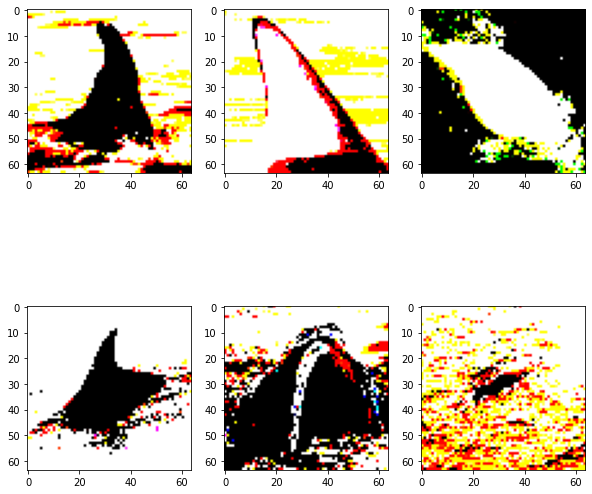

In [134]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(X[0])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(X[1])
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(X[2])
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(X[3])
ax4 = fig.add_subplot(2,3,5)
ax4.imshow(X[4])
ax4 = fig.add_subplot(2,3,6)
ax4.imshow(X[5])
plt.show()

In [135]:
print(X[0])

[[[ 6.4060997e+01  4.7221001e+01  3.5320000e+01]
  [ 6.5060997e+01  4.6221001e+01  3.4320000e+01]
  [ 6.4060997e+01  4.2221001e+01  3.1320000e+01]
  ...
  [ 5.4060997e+01  2.9221001e+01  1.2320000e+01]
  [ 6.2060997e+01  3.6221001e+01  2.1320000e+01]
  [ 6.4060997e+01  3.8221001e+01  2.3320000e+01]]

 [[ 6.2060997e+01  4.0221001e+01  2.9320000e+01]
  [ 6.3060997e+01  3.9221001e+01  2.8320000e+01]
  [ 5.6060997e+01  3.4221001e+01  2.3320000e+01]
  ...
  [ 5.4060997e+01  3.4221001e+01  1.8320000e+01]
  [ 5.7060997e+01  3.7221001e+01  2.1320000e+01]
  [ 6.3060997e+01  4.1221001e+01  2.5320000e+01]]

 [[ 3.9060997e+01  8.2210007e+00 -5.6800003e+00]
  [ 3.3060997e+01  5.2210007e+00 -9.6800003e+00]
  [ 3.7060997e+01  9.2210007e+00 -5.6800003e+00]
  ...
  [ 6.8060997e+01  4.9221001e+01  3.7320000e+01]
  [ 6.6060997e+01  4.7221001e+01  3.5320000e+01]
  [ 6.5060997e+01  4.2221001e+01  2.8320000e+01]]

 ...

 [[-1.2939003e+01 -2.9778999e+01 -4.1680000e+01]
  [-2.9390030e+00 -1.8778999e+01 -3.068

In [98]:
model.layers

In [62]:
model.weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
    

In [88]:
model.layers[2].weights[0][0]

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([-0.00856473, -0.01035089,  0.02215136,  0.04308866,  0.02501501,
        0.00173162,  0.04364447,  0.04537347, -0.01132948,  0.00995705,
       -0.04095203,  0.02519641,  0.01391756, -0.0274231 ,  0.0210314 ,
        0.04652968,  0.02013588,  0.01205688, -0.00884236,  0.00539573,
        0.02634334, -0.00454022, -0.00269121,  0.02360524, -0.03727935,
        0.02314161,  0.00459906, -0.01319162, -0.04371614, -0.00361074,
       -0.03288698,  0.00167863,  0.01728582,  0.02265956,  0.03149408,
       -0.00135352,  0.01405084,  0.00974723,  0.02337126, -0.03304514,
       -0.01094945, -0.01222512, -0.02656086,  0.00649457, -0.03527532,
        0.02483225, -0.03380935, -0.00240096,  0.03357095, -0.03974664,
        0.03487782, -0.02396789, -0.02064827, -0.02830588, -0.03754086,
        0.04031073,  0.0386755 ,  0.03109389,  0.02430813, -0.02769016,
        0.03777351, -0.00010052,  0.03837903, -0.01668411,  0.01029419,
       -0.030729

In [72]:
X[0].shape

(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


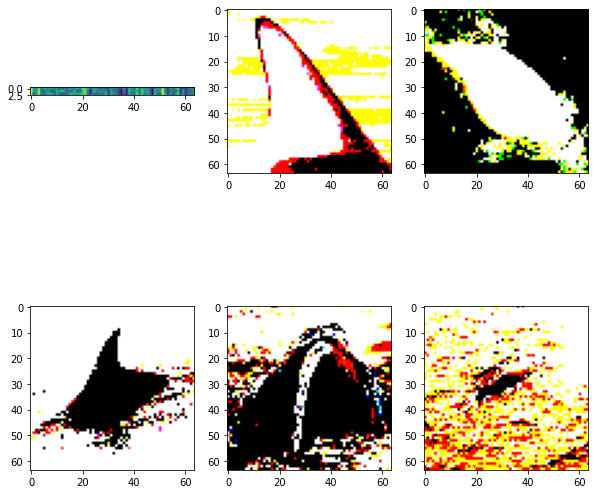

In [141]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(model.layers[0].weights[0][0][0])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(X[1])
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(X[2])
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(X[3])
ax4 = fig.add_subplot(2,3,5)
ax4.imshow(X[4])
ax4 = fig.add_subplot(2,3,6)
ax4.imshow(X[5])
plt.show()